### Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

# Enter "pip install -e ." into terminal to install neural_final_proj as editable package
from neural_final_proj.models import *

IMAGE_SIZE = 64 # Resizing to 64x64 pixels
BATCH_SIZE = 64
NUM_CLASSES = 10 
NUM_EPOCHS = 20
DATA_ROOT = 'data/Sports'
DEVICE = torch.device("cpu") 
MODELS_DIR = 'model_A_results'

In [3]:
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir('..')
current_folder_name = os.path.basename(os.getcwd())

print(f"Current directory: {current_folder_name}")
print(f"Using device: {DEVICE}")
print(f"Image Size: {IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"Data will be pulled from: {DATA_ROOT}")
print(f"Models will be saved to: {MODELS_DIR}")

Current directory: EE4745_Final_Proj
Using device: cpu
Image Size: 64x64
Data will be pulled from: data/Sports
Models will be saved to: model_A_results


### Cell 2: Data Preparation

In [4]:
try:
    train_loader, val_loader, class_names, val_dataset = prepare_data_loaders(
        DATA_ROOT, IMAGE_SIZE, BATCH_SIZE
    )
    print(f"Loaded {len(class_names)} classes: {class_names}")
    print(f"Train samples: {len(train_loader.dataset)}, Validation samples: {len(val_loader.dataset)}")
except Exception as e:
    print(f"\n--- DATASET ERROR ---")
    print(f"Please check that your dataset is located at '{DATA_ROOT}' with 'train' and 'valid' subfolders.")
    print(f"Error details: {e}")

Loaded 10 classes: ['baseball', 'basketball', 'football', 'golf', 'hockey', 'rugby', 'swimming', 'tennis', 'volleyball', 'weightlifting']
Train samples: 1593, Validation samples: 50


### Model Initialization and Training (Custom CNN)


In [6]:
CNN_LOG_DIR = 'runs/problem_A_CNN'
model_cnn = CustomCNN(num_classes=NUM_CLASSES).to(DEVICE)
print(f"CustomCNN initialized. Parameters: {count_parameters(model_cnn)}")

# Train Model 1
results_cnn = train_model(
    model_cnn, 
    "CustomCNN", 
    train_loader, 
    val_loader, 
    NUM_EPOCHS, 
    DEVICE, 
    class_names,
    CNN_LOG_DIR,
    MODELS_DIR
)
print(f"\nCustomCNN Training Complete.")
print(f"Final Validation Accuracy: {results_cnn['final_val_accuracy']:.2f}%")

CustomCNN initialized. Parameters: 4293194

--- Training CustomCNN (Params: 4293194) on cpu ---
Epoch 1/20 | Train Acc: 24.67% | Val Acc: 44.00% | Time: 2.58s
Epoch 2/20 | Train Acc: 39.86% | Val Acc: 50.00% | Time: 2.82s
Epoch 3/20 | Train Acc: 47.39% | Val Acc: 46.00% | Time: 2.76s
Epoch 4/20 | Train Acc: 52.86% | Val Acc: 46.00% | Time: 2.68s
Epoch 5/20 | Train Acc: 55.93% | Val Acc: 62.00% | Time: 2.60s
Epoch 6/20 | Train Acc: 60.01% | Val Acc: 56.00% | Time: 3.06s
Epoch 7/20 | Train Acc: 62.65% | Val Acc: 60.00% | Time: 2.71s
Epoch 8/20 | Train Acc: 65.35% | Val Acc: 68.00% | Time: 2.63s
Epoch 9/20 | Train Acc: 68.74% | Val Acc: 56.00% | Time: 2.54s
Epoch 10/20 | Train Acc: 70.31% | Val Acc: 62.00% | Time: 2.57s
Epoch 11/20 | Train Acc: 71.63% | Val Acc: 66.00% | Time: 2.78s
Epoch 12/20 | Train Acc: 73.82% | Val Acc: 70.00% | Time: 2.60s
Epoch 13/20 | Train Acc: 75.27% | Val Acc: 70.00% | Time: 2.55s
Epoch 14/20 | Train Acc: 77.90% | Val Acc: 66.00% | Time: 2.47s
Epoch 15/20 | Tra

### Model Initialization and Training (ResNet Small)

In [7]:
RESNET_LOG_DIR = 'runs/problem_A_RESNET'

model_resnet = ResNetSmall(num_classes=NUM_CLASSES).to(DEVICE)
print(f"ResNetSmall initialized. Parameters: {count_parameters(model_resnet)}")

# Train Model 2
results_resnet = train_model(
    model_resnet,
    "ResNetSmall",   
    train_loader,
    val_loader,
    NUM_EPOCHS,
    DEVICE,
    class_names,
    RESNET_LOG_DIR,
    MODELS_DIR
)
print(f"\nResNetSmall Training Complete.")
print(f"Final Validation Accuracy: {results_resnet['final_val_accuracy']:.2f}%")

ResNetSmall initialized. Parameters: 701466

--- Training ResNetSmall (Params: 701466) on cpu ---
Epoch 1/20 | Train Acc: 34.09% | Val Acc: 32.00% | Time: 8.75s
Epoch 2/20 | Train Acc: 50.41% | Val Acc: 60.00% | Time: 8.74s
Epoch 3/20 | Train Acc: 54.68% | Val Acc: 56.00% | Time: 8.46s
Epoch 4/20 | Train Acc: 60.77% | Val Acc: 54.00% | Time: 8.39s
Epoch 5/20 | Train Acc: 60.83% | Val Acc: 62.00% | Time: 8.34s
Epoch 6/20 | Train Acc: 64.97% | Val Acc: 46.00% | Time: 8.35s
Epoch 7/20 | Train Acc: 63.72% | Val Acc: 54.00% | Time: 8.10s
Epoch 8/20 | Train Acc: 67.42% | Val Acc: 62.00% | Time: 8.44s
Epoch 9/20 | Train Acc: 68.86% | Val Acc: 70.00% | Time: 7.90s
Epoch 10/20 | Train Acc: 72.07% | Val Acc: 72.00% | Time: 8.09s
Epoch 11/20 | Train Acc: 72.00% | Val Acc: 60.00% | Time: 8.22s
Epoch 12/20 | Train Acc: 72.94% | Val Acc: 60.00% | Time: 8.23s
Epoch 13/20 | Train Acc: 75.71% | Val Acc: 72.00% | Time: 8.32s
Epoch 14/20 | Train Acc: 76.46% | Val Acc: 70.00% | Time: 8.20s
Epoch 15/20 | T

### Model Comparison and Reporting

In [ ]:
data = [results_cnn, results_resnet]

WIDTH_MODEL = 15
WIDTH_COUNT = 18
WIDTH_TIME = 25
WIDTH_ACCURACY = 25

print("\n"+5*" "+"Model Overview\n"+60*"-")
print(
    f"{'Model':<{WIDTH_MODEL}}" +
    f"{'Parameter Count':<{WIDTH_COUNT}}" + 
    f"{'Total Training Time (s)':<{WIDTH_TIME}}" +
    f"{'Final Val Accuracy (%)':<{WIDTH_ACCURACY}}"
)
for r in data:
    print(
        f"{r['model_name']:<{WIDTH_MODEL}}" +
        f"{r['parameter_count']:<{WIDTH_COUNT},d}" +
        f"{r['total_training_time']:<{WIDTH_TIME}.2f}" +
        f"{r['final_val_accuracy']:<{WIDTH_ACCURACY}.2f}"
    )

# Per-Class Performance (CustomCNN)
print("\n\n"+5*" "+"Per-Class Performance (CustomCNN)\n"+60*"-")
print(classification_report(results_cnn['all_labels'], 
                            results_cnn['all_preds'], 
                            target_names=class_names, 
                            output_dict=False))

# Per-Class Performance (ResNetSmall)
print("\n"+5*" "+"Per-Class Performance (ResNetSmall)\n"+60*"-")
print(classification_report(results_resnet['all_labels'], 
                            results_resnet['all_preds'], 
                            target_names=class_names, 
                            output_dict=False))


     Model Overview
------------------------------------------------------------
Model          Parameter Count   Total Training Time (s)  Final Val Accuracy (%)   
CustomCNN      4,293,194         53.35                    58.00                    
ResNetSmall    701,466           166.77                   76.00                    


     Per-Class Performance (CustomCNN)
------------------------------------------------------------
               precision    recall  f1-score   support

     baseball       0.60      0.60      0.60         5
   basketball       0.75      0.60      0.67         5
     football       0.33      0.20      0.25         5
         golf       0.67      0.80      0.73         5
       hockey       0.71      1.00      0.83         5
        rugby       0.25      0.20      0.22         5
     swimming       0.83      1.00      0.91         5
       tennis       0.40      0.40      0.40         5
   volleyball       0.40      0.40      0.40         5
weightlifting

### Visualization (Training/Validation Curves)

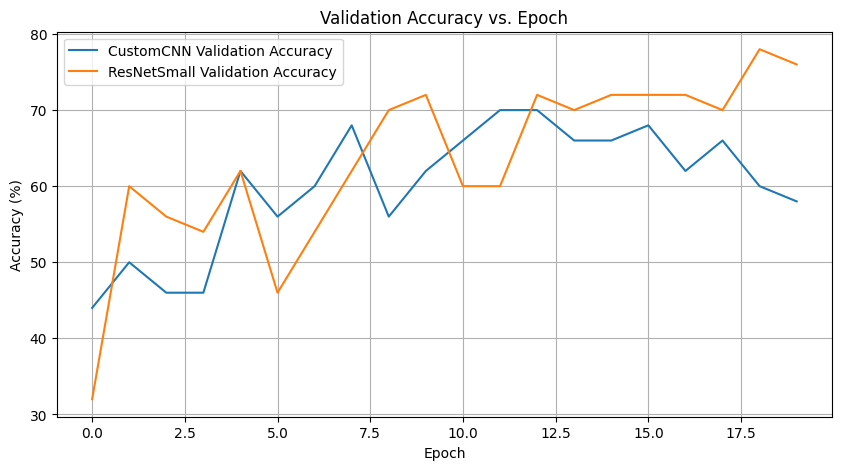

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results_cnn['val_accuracies'], label='CustomCNN Validation Accuracy')
plt.plot(results_resnet['val_accuracies'], label='ResNetSmall Validation Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# NOTE: The full loss and accuracy curves should be viewed in TensorBoard.
# Run this command in your terminal:
# tensorboard --logdir runs

### Model Interpretability (Saliency & Grad-CAM)

--- Visualization Params ---
True Label:    baseball
Tensor Shape:  torch.Size([1, 3, 64, 64])

--- Visualization for CustomCNN ---


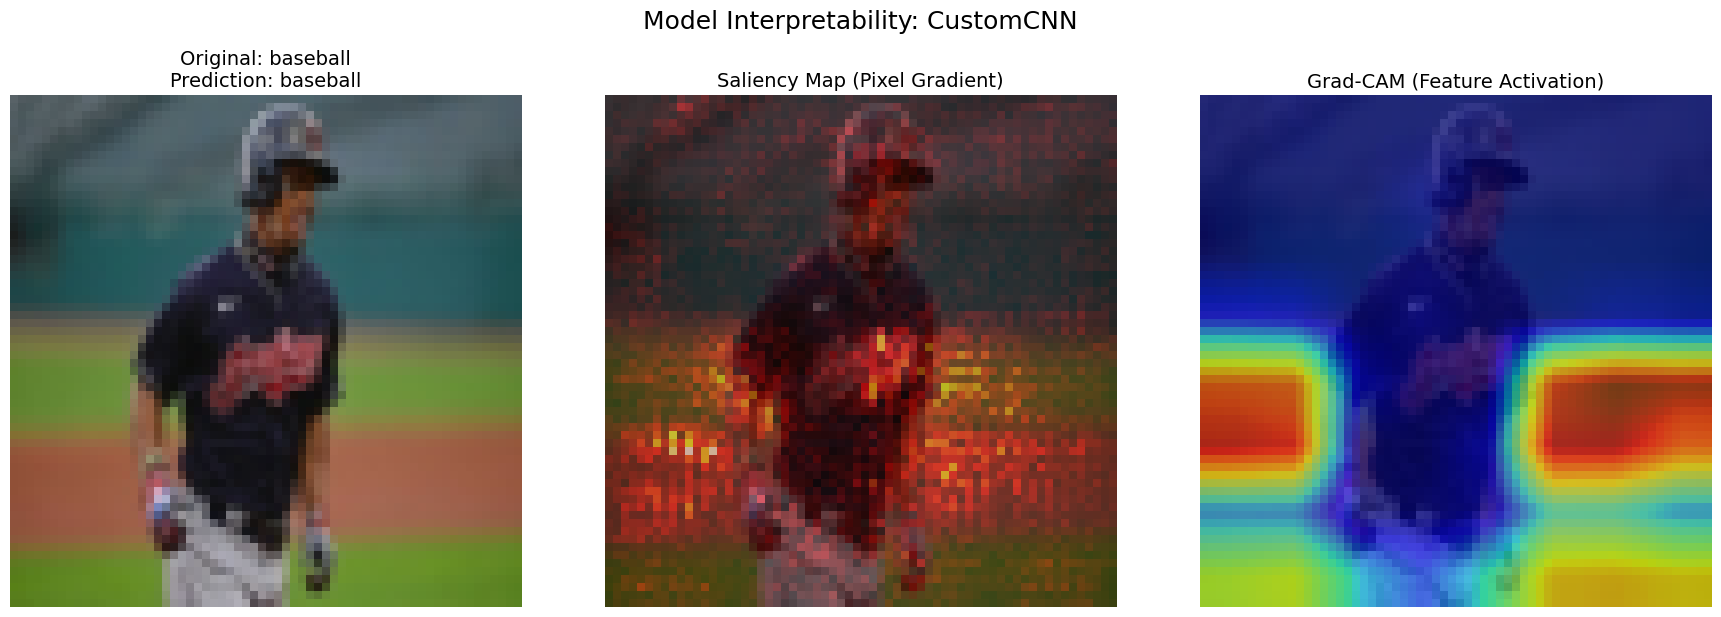


--- Visualization for ResNetSmall ---


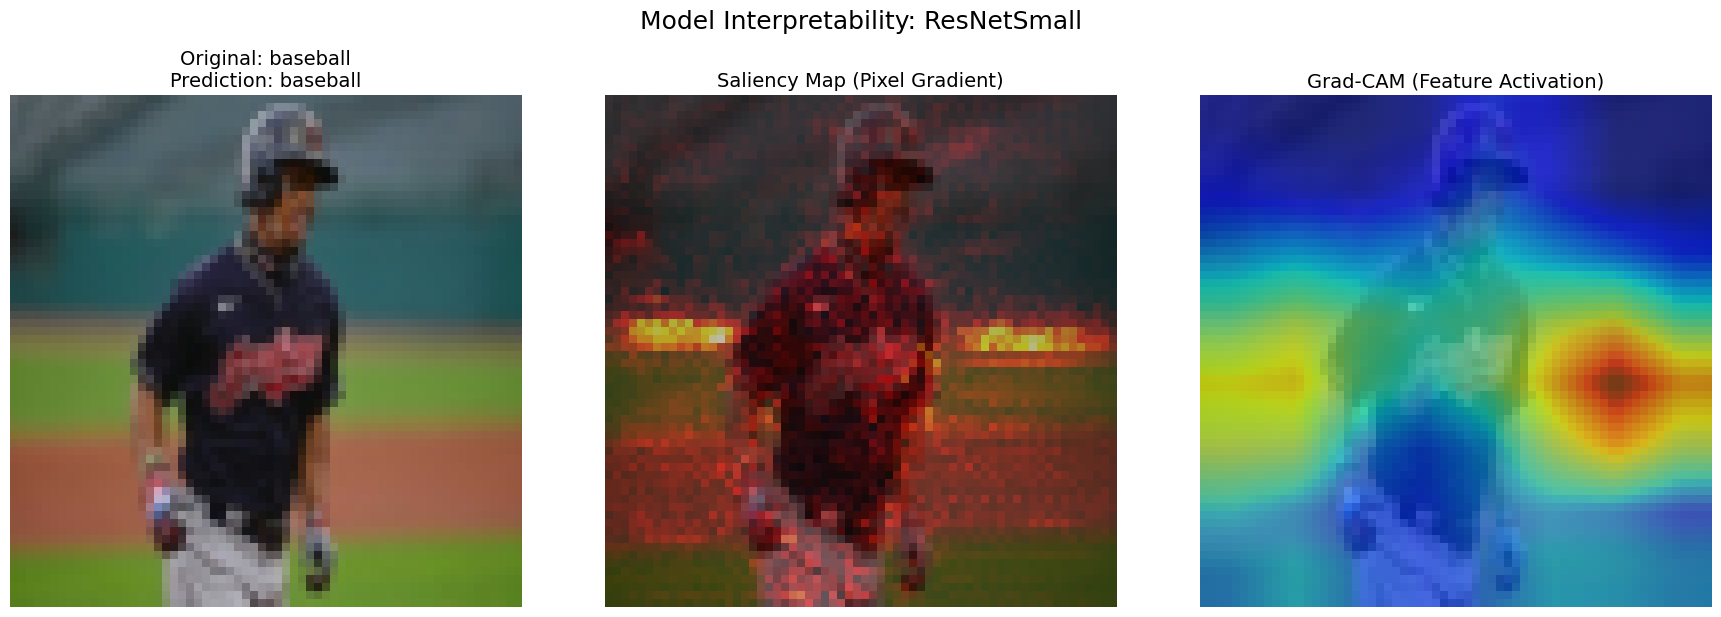

In [27]:
sample_idx = 0 
sample_img_tensor, actual_label_idx = val_dataset[sample_idx]
actual_class = class_names[actual_label_idx]
input_tensor = sample_img_tensor.unsqueeze(0).to(DEVICE)

print(f"--- Visualization Params ---")
print(f"{"True Label:":<15}{actual_class}")
print(f"{"Tensor Shape:":<15}{input_tensor.shape}")

print("\n--- Visualization for CustomCNN ---")
plot_interpretability_results(
    model=model_cnn, 
    model_name="CustomCNN", 
    input_tensor=input_tensor, 
    sample_img_tensor=sample_img_tensor, 
    actual_label=actual_label_idx, 
    class_names=class_names,
    models_dir=MODELS_DIR
)

print("\n--- Visualization for ResNetSmall ---")
plot_interpretability_results(
    model=model_resnet, 
    model_name="ResNetSmall", 
    input_tensor=input_tensor, 
    sample_img_tensor=sample_img_tensor, 
    actual_label=actual_label_idx, 
    class_names=class_names,
    models_dir=MODELS_DIR
)